In [2]:
import os
import sys
sys.path.append("..")  # add top folder to path

import tinymolecule

import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

In [3]:
tt = tinymolecule.TinyTrain()

In [4]:
ta = tinymolecule.TinyAnalyze()

In [5]:
ta.get_smiles_from_uuid("ec0fdc31")

'CCCN(C(=O)OCc1ccccc1)C1CCN(CC[C@@H](CN(C)S(=O)(=O)c2ccccc2)c2ccccc2)CC1'

In [7]:
from moses.utils import get_mol

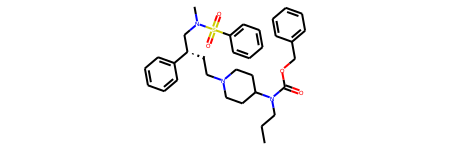

In [8]:
get_mol(ta.get_smiles_from_uuid("ec0fdc31"))

In [4]:
ta.get_molecular_properties([
    "ec0fdc31",
    "e8244ede",
    "82301e56",
    "802f05ac",
    "1f3586a9"
])

{'ec0fdc31': {'MCF_PAINS_pass': True,
  'logP': 5.994200000000007,
  'QED': 0.24949291816662938,
  'SA': 2.996830627015026,
  'weight': 577.7910000000002,
  'n_rings': 4},
 'e8244ede': {'MCF_PAINS_pass': True,
  'logP': 5.825800000000007,
  'QED': 0.3397392620058908,
  'SA': 2.6949474504507673,
  'weight': 490.71300000000025,
  'n_rings': 4},
 '82301e56': {'MCF_PAINS_pass': True,
  'logP': 6.860500000000008,
  'QED': 0.3314178880122684,
  'SA': 3.4677551581760913,
  'weight': 516.7700000000003,
  'n_rings': 5},
 '802f05ac': {'MCF_PAINS_pass': False,
  'logP': 10.229199999999999,
  'QED': 0.31110821186043863,
  'SA': 6.7262359907614835,
  'weight': 708.0189999999999,
  'n_rings': 6},
 '1f3586a9': {'MCF_PAINS_pass': True,
  'logP': 5.209600000000006,
  'QED': 0.426220213403375,
  'SA': 3.618137764509397,
  'weight': 540.7520000000003,
  'n_rings': 6}}

In [5]:
ta.prioritize()

molecules prioritized, you can access at TinyAnalyze.priority_df


In [7]:
ta.priority_df

,uuid,variants_mean,off_targets_max,objective
4369,ec0fdc31,9.176,7.830,1.346
2609,e8244ede,9.328,8.040,1.288
3789,82301e56,9.410,8.140,1.270
2130,802f05ac,10.678,9.420,1.258
804,1f3586a9,9.654,8.410,1.244
...,...,...,...,...
1555,29fe37a2,8.672,10.610,-1.938
2646,8bf1eff2,8.950,10.940,-1.990
3940,96aa6c13,7.026,9.075,-2.049
1768,e97be3e0,8.482,10.550,-2.068


In [6]:
ccr5_mol_props_and_baff = ta.get_mol_props_and_baff()

In [31]:

for x in [4, 4, 5, 6, 6, 5, 4]:
    print(x, " ", percentileofscore(list(ccr5_mol_props_and_baff["n_rings"]), x))

4   33.34177856599949
4   33.34177856599949
5   74.20825943754751
6   95.39523688877628
6   95.39523688877628
5   74.20825943754751
4   33.34177856599949


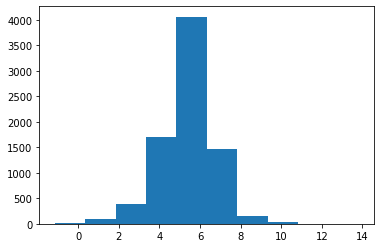

In [11]:
plt.hist(ccr5_mol_props_and_baff["logP"])
plt.show()

In [ ]:
ta.get_molecular_properties(["e8244ede")

In [8]:
tt.get_assays_data("/Users/Munchic/Developer/Capstone/tinymolecule/data/ccr5_ic50_meta.csv")
tt.assays.head()

assays data prepared, you can access at .assays


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,75508,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,335.0
1,NaN,75509,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,28.0
2,NaN,75510,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,10.0
3,NaN,76739,[],CHEMBL873385,Binding affinity against human CCR5 receptor s...,B,BAO_0000190,BAO_0000219,cell-based format,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,35.0
4,NaN,77749,[],CHEMBL654653,Binding affinity against C-C chemokine recepto...,B,BAO_0000190,BAO_0000219,cell-based format,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,...,Homo sapiens,C-C chemokine receptor type 5,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,15.0


In [5]:
# tt.write_train_csv()

In [6]:
td = tinymolecule.TinyDock()
# td.prepare_molecules(which_ligands="train")

In [6]:
td.dock(targets=["CCR2"], subsample=1)

>>> DOCKING 6036 MOLECULES ON CCR2 <<< 
subsampling 6036 molecules to dock
docking molecule 2de25107 (1/6036) ❌ subprocess error
docking molecule edb0ba0a (2/6036) ✅ success
docking molecule ace426bc (3/6036) ✅ success
docking molecule af4a11ad (4/6036) ✅ success
docking molecule e2fedb66 (5/6036) ✅ success
docking molecule 46c9ee4a (6/6036) ✅ success
docking molecule 05208265 (7/6036)

KeyboardInterrupt: 

False